# Labolatorium 2

importowanie bibliotek

In [1]:
import time
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette("bright")

In [2]:
SAVE_PLOTS=True

In [3]:
if SAVE_PLOTS:
    os.makedirs("./plots",exist_ok=True)
    directory="./plots/"

# Zadanie 1

Przygotuj program generujący następujące zbiory punktów na płaszczyźnie
(współrzędne rzeczywiste typu double):

a) zawierający 100 losowo wygenerowanych punktów o współrzędnych z przedziału
[-100, 100],

b) zawierający 100 losowo wygenerowanych punktów leżących na okręgu o środku
(0,0) i promieniu R=10,

c) zawierający 100 losowo wygenerowanych punktów leżących na bokach prostokąta
o wierzchołkach (-10, 10), (-10,-10), (10,-10), (10,10),

d) zawierający wierzchołki kwadratu (0, 0), (10, 0), (10, 10), (0, 10) oraz punkty
wygenerowane losowo w sposób następujący: po 25 punktów na dwóch bokach
kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu.

### Podpunkt A

In [4]:
points_a = np.random.uniform(-100, 100, size =[100, 2])
table_a = pd.DataFrame(data=points_a, columns=['X', 'Y'])
print(table_a)

            X          Y
0  -89.107528 -18.141226
1   59.725501 -78.732431
2  -64.598337 -22.139804
3   88.674104 -50.546238
4  -79.258428 -43.428790
..        ...        ...
95  55.482771  76.374652
96 -41.482133 -26.928769
97   8.252097 -44.226285
98 -55.251237 -63.720461
99   3.760856  66.306940

[100 rows x 2 columns]


### Podpunkt B

In [5]:
points_b=[None for _ in range(100)]
for i in range(100):
    angle=np.random.uniform(0,2*np.pi)
    x=np.cos(angle)*10
    y=np.sin(angle)*10
    points_b[i]=(x,y)
table_b=pd.DataFrame(data=points_b, columns=['X','Y'])
print(table_b)

           X         Y
0  -1.715295  9.851790
1  -9.885512 -1.508860
2  -4.847561  8.746494
3   9.769700 -2.133765
4  -9.414962  3.370236
..       ...       ...
95 -7.972369 -6.036665
96  6.427887 -7.660435
97  6.446668  7.644637
98  8.710540  4.911873
99  9.883345  1.522988

[100 rows x 2 columns]


### Podpunkt C

In [6]:
points_c=[[None,None] for _ in range(100)]
tens=[-10,10]
for i in range(100):
    # (0,2) ponieważ losuje liczbe całkowitą z przedziału 0 ≤ x < 2
    index_1=np.random.randint(0,2)
    index_2=np.random.randint(0,2)
    
    points_c[i][index_1]=tens[index_2]
    points_c[i][1-index_1]=np.random.uniform(-10,10)
    
    #pętla while zapobiega powstaniu punktów na krawędziach kwadratu
    while (points_c[i][0]==10 or points_c[i][0]==-10) and (points_c[i][1]==10 or points_c[i][1]==-10):
        index_1=np.random.randint(0,2)
        index_2=np.random.randint(0,2)
        points_c[i][index_1]=tens[index_2]
        points_c[i][1-index_1]=np.random.uniform(-10,10)
        
table_c=pd.DataFrame(data=points_c, columns=['X','Y'])
print(table_c)

            X          Y
0    3.203934  10.000000
1  -10.000000  -7.618976
2  -10.000000  -0.353235
3    2.323318  10.000000
4   -2.360867 -10.000000
..        ...        ...
95  10.000000   2.359101
96  10.000000   7.914615
97  -7.709486 -10.000000
98 -10.000000   8.458830
99   2.785579  10.000000

[100 rows x 2 columns]


### Podpunkt D

In [7]:
points_d=[ [None, None] for _ in range(94)]
for i in range(2):
    for j in range(25):
        points_d[(i*25)+j][i]=0
        points_d[(i*25)+j][1-i]=np.random.uniform(0,10)
for i in range(20):
    point=np.random.uniform(0,10)
    points_d[50+i][0]=point
    points_d[50+i][1]=point
    
    x=np.random.uniform(0,10)
    y=-x+10
    points_d[70+i][0]=x
    points_d[70+i][1]=y
    
points_d[90]=[0,0]
points_d[91]=[10,0]
points_d[92]=[10,10]
points_d[93]=[0,10]

table_d=pd.DataFrame(data=points_d, columns=['X','Y'])
print(table_d)

            X          Y
0    0.000000   9.192507
1    0.000000   2.376823
2    0.000000   5.612325
3    0.000000   5.181988
4    0.000000   8.549470
..        ...        ...
89   5.900333   4.099667
90   0.000000   0.000000
91  10.000000   0.000000
92  10.000000  10.000000
93   0.000000  10.000000

[94 rows x 2 columns]


# Zadanie 2

Uruchom wizualizację graficzną utworzonych zbiorów punktów.

### Zbiór punktów A

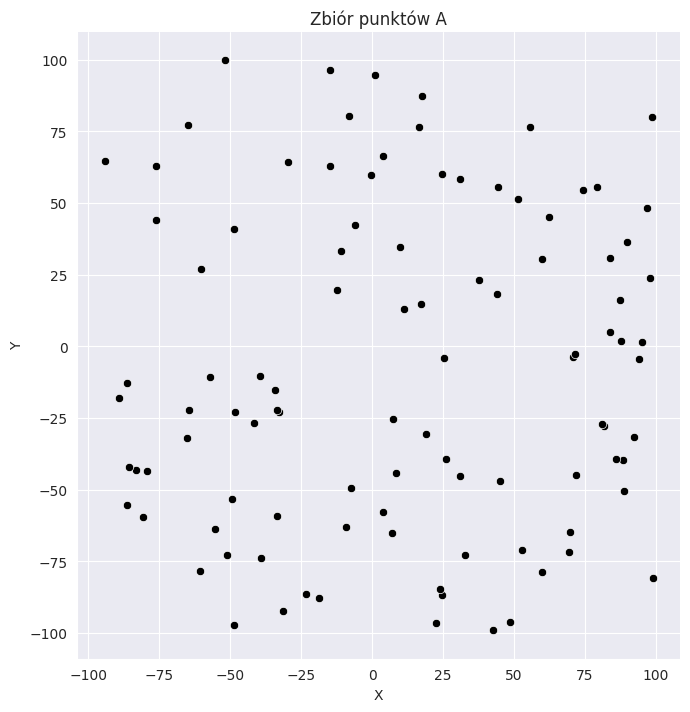

In [8]:
plot_a =sns.relplot(data=table_a ,x='X', y='Y', height=7, color="black").set(title="Zbiór punktów A")

### Zbiór punktów B

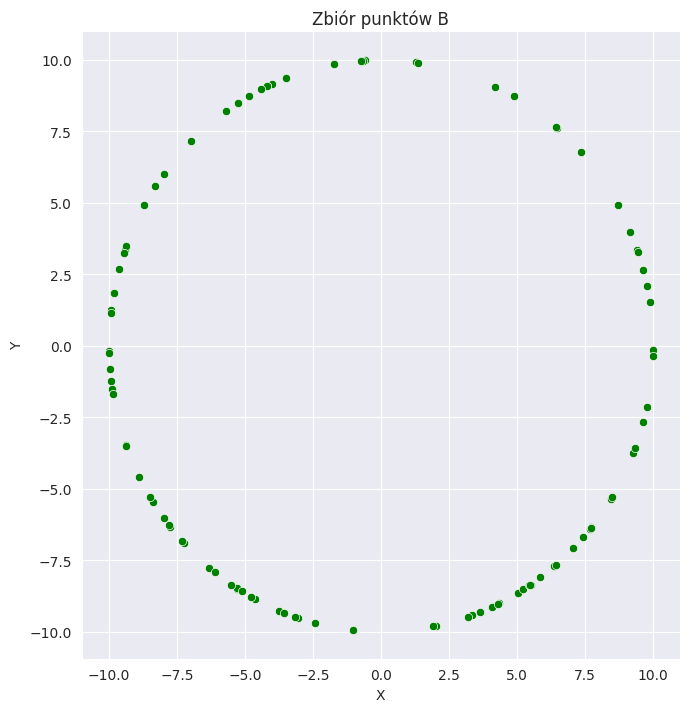

In [9]:
plot_b=sns.relplot(data=table_b, x='X', y='Y', height=7, color="green").set(title="Zbiór punktów B")

### Zbiór punktów C

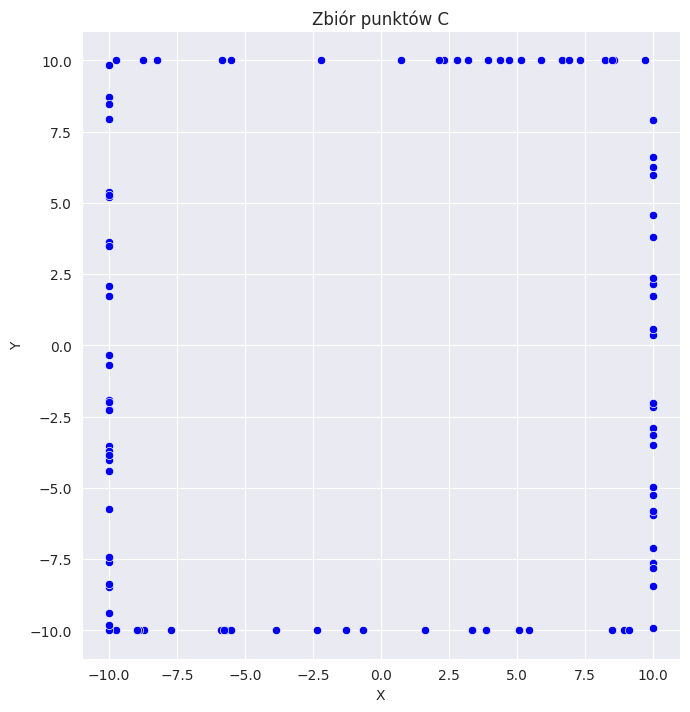

In [10]:
plot_c=sns.relplot(data=table_c, x='X', y='Y', height=7, color="blue").set(title="Zbiór punktów C")

### Zbiór punktów D

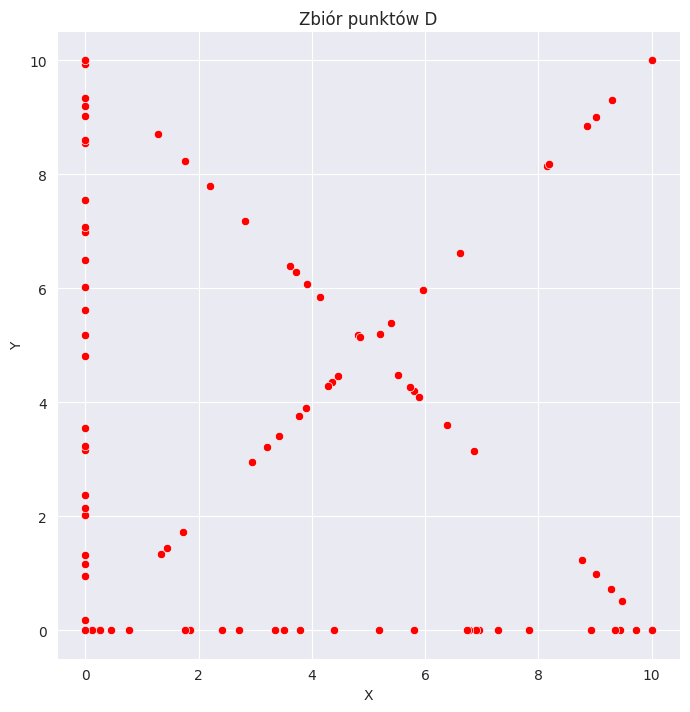

In [11]:
plot_c=sns.relplot(data=table_d, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów D")

# Zadanie 3

Zmodyfikuj program z punktu 1 tak, aby możliwe było zadawanie określonych
parametrów dla schematów losowania punktów podanych powyżej:

a) liczba punktów, przedziały dla współrzędnych,

b) liczba punktów, środek i promień okręgu,

c) liczba punktów, wierzchołki prostokąta,

d) wierzchołki kwadratu, liczba punktów na osiach, liczba punktów na przekątnych.

## a)

In [12]:
def setA(number_of_points, begin,end):
    points_a = np.random.uniform(begin, end, size =[number_of_points, 2])
    table_a = pd.DataFrame(data=points_a, columns=['X', 'Y'])
    return table_a

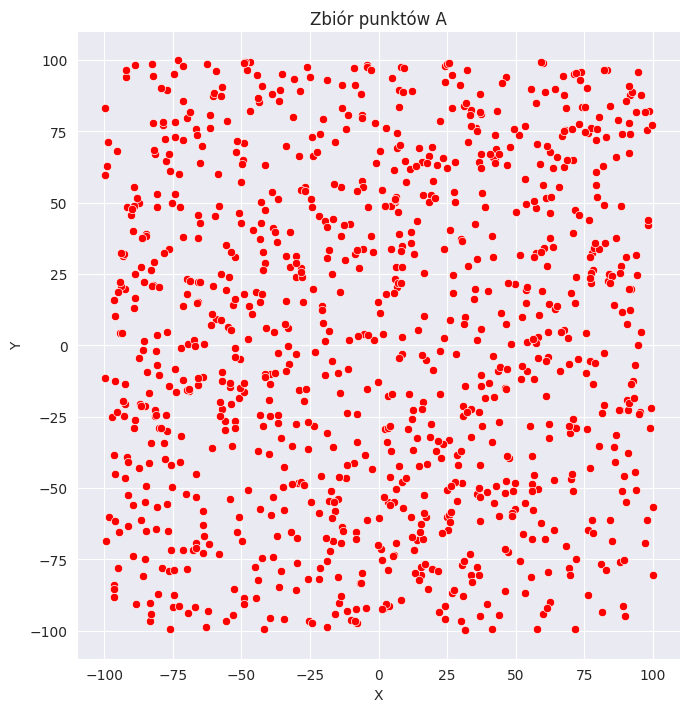

In [13]:
table=setA(1000,-100,100)
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów A")

## b)

In [14]:
def setB(number_of_points, center, radius):
    points_b=[None for _ in range(number_of_points)]
    for i in range(number_of_points):
        angle=np.random.uniform(0,2*np.pi)
        x=np.cos(angle)*radius + center[0]
        y=np.sin(angle)*radius + center[1]
        points_b[i]=(x,y)
    table_b=pd.DataFrame(data=points_b, columns=['X','Y'])
    return table_b

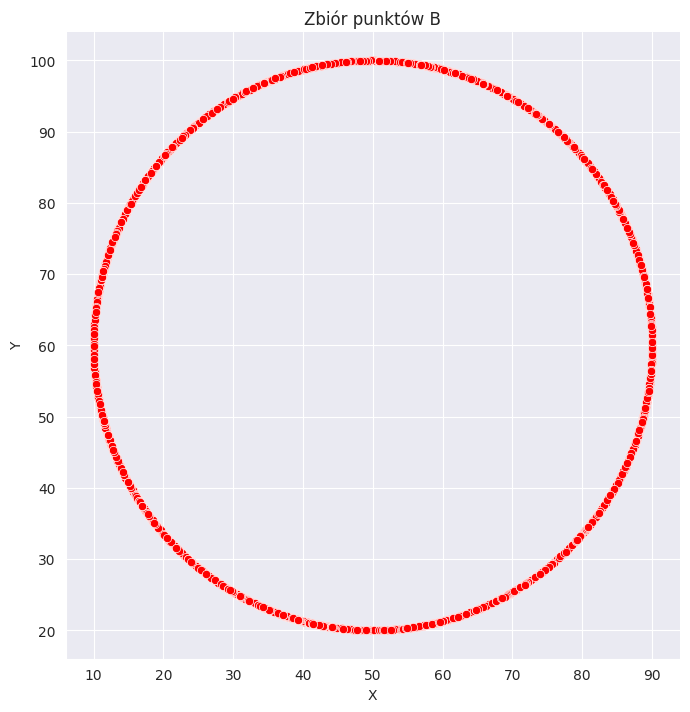

In [15]:
table=setB(10000,(50,60),40)
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów B")

## c)

In [16]:
def setC(number_of_points, lowerLeft, upperRight):
    points_c=[[None,None] for _ in range(number_of_points)]
    xL=lowerLeft[0]
    xR=upperRight[0]
    yL=lowerLeft[1]
    yR=upperRight[1]
    
    for i in range(number_of_points):
        n = np.random.randint(0,4)
        if n==0:
            points_c[i][0]=xL
            points_c[i][1]=np.random.uniform(yL,yR)
            while points_c[i][1]==yR or points_c[i][1]==yL:
                points_c[i][1]=np.random.uniform(yL,yR)
            
        elif n==1:
            points_c[i][0]=xR
            points_c[i][1]=np.random.uniform(yL,yR)
            while points_c[i][1]==yR or points_c[i][1]==yL:
                points_c[i][1]=np.random.uniform(yL,yR)
            
            
        elif n==2:
            points_c[i][1]=yL
            points_c[i][0]=np.random.uniform(xL,xR)
            while points_c[i][0]==xR or points_c[i][0]==xL:
                points_c[i][0]=np.random.uniform(xL,xR)
            
            
        else:
            points_c[i][1]=yR
            points_c[i][0]=np.random.uniform(xL,xR)
            while points_c[i][0]==xR or points_c[i][0]==xL:
                points_c[i][0]=np.random.uniform(xL,xR)

    table_c=pd.DataFrame(data=points_c, columns=['X','Y'])
    return table_c

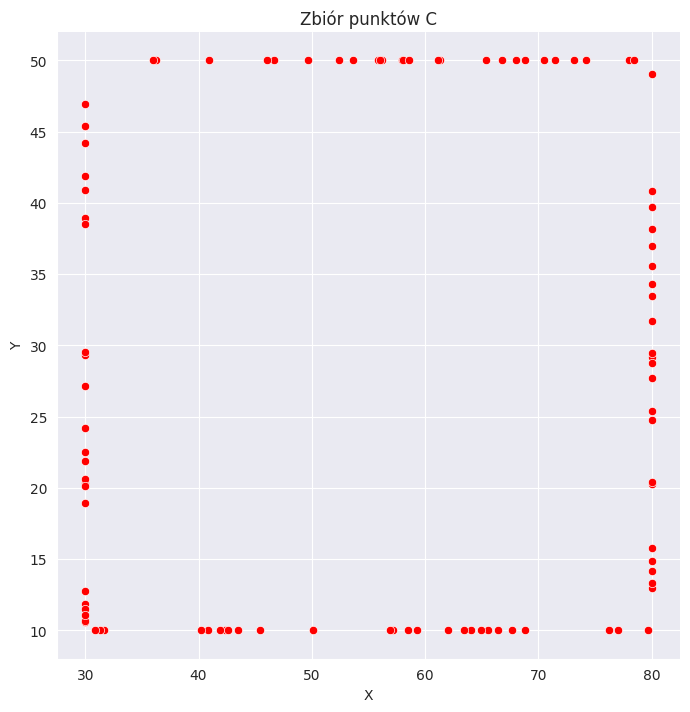

In [17]:
table=setC(100, (30,10), (80,50))
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów C")

## d)

In [18]:
# lewym dolnym wierzchołkiem jest zawsze punkt (0,0)
def setD(upperRight, axis, borders):
    points_d=[ [None, None] for _ in range(axis+borders+4)]
    
    for j in range(axis):
        n=np.random.randint(0,2)
        if n==0:
            points_d[j][0]=0
            points_d[j][1]=np.random.uniform(0,upperRight[1])       
        elif n==1:
            points_d[j][n]=0
            points_d[j][1-n]=np.random.uniform(0,upperRight[0])
    
    for j in range(axis, axis+borders):
        n=np.random.randint(0,2)
        x=np.random.uniform(0,upperRight[0])
        if n==0:
            points_d[j][0]=x
            points_d[j][1]=x       
        elif n==1:
            points_d[j][0]=x
            points_d[j][1]=-x+upperRight[1]

    points_d[axis+borders]=[0,0]
    points_d[axis+borders+1]=[upperRight[0],0]
    points_d[axis+borders+2]=[upperRight[0],upperRight[1]]
    points_d[axis+borders+3]=[0,upperRight[1]]

    table_d=pd.DataFrame(data=points_d, columns=['X','Y'])
    return table_d

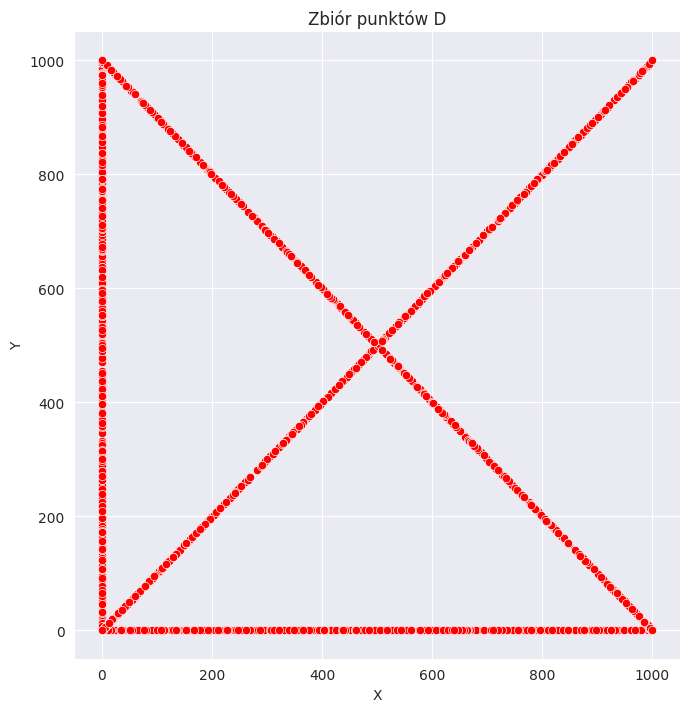

In [19]:
table=setD((1000,1000), 1000, 1000)
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów D")

# Zadanie 4

Zaimplementuj algorytmy Grahama oraz Jarvisa wyznaczające otoczkę wypukłą dla
zadanego zbioru punktów. Przetestuj program na zbiorach z punktu 1 oraz
zmodyfikowanych zbiorach z punktu 3. Program powinien pozwolić na zapisanie w
pliku wyniku działania, czyli ciągu wierzchołków otoczki. Dodaj możliwość
sprawdzenia czasu działania algorytmu.

## Funkcje wizualizujące działanie algorytmu

In [20]:
def makeplot(points, ch, title, filename, SAVE=False):
    x=points['X']
    y=points['Y']
    plt.scatter(x,y, color='black')
    x_ch=ch[0][:-1]
    y_ch=ch[1][:-1]
    plt.plot(x_ch, y_ch, '-o', color='blue')
    plt.plot(ch[0][-2:], ch[1][-2:], '-o', color='red')
    plt.title(title)
    plt.show()
    if SAVE:
        plt.savefig(directory+filename)

In [21]:
def makefinalplot(points,ch,title,filename,SAVE=False):
    x=points['X']
    y=points['Y']
    plt.scatter(x,y, color='black')
    ch[0].append(ch[0][0])
    ch[1].append(ch[1][0])
    x_ch=ch[0]
    y_ch=ch[1]
    plt.plot(x_ch, y_ch, '-o', color='blue')
    plt.title(title)
    plt.show()

### Stałe:

In [22]:
# Epsilon for det function
epsilon = 10**(-12)

### Funkcje pomocniczne:

In [70]:
def matrix_2x2(a,b,c):
    return [[a[0]-c[0], a[1]-c[1]], [ b[0]-c[0], b[1]-c[1]]]

def det_2x2(a,b,c):
    matrix=matrix_2x2(a,b,c)
    return (matrix[0][0]*matrix[1][1])-(matrix[0][1]*matrix[1][0])

def orientation(a,b,c):
    det = det_2x2(a,b,c)
    if det > epsilon:
        return 1
    elif det <-epsilon:
        return -1
    return 0

In [71]:
def distance(a,b):
    return np.sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)

def partition(array, low, high, a):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if (orientation(a,array[j],pivot)==1) or (orientation(a,array[j],pivot)==0 and distance(a,array[j])>distance(a,pivot)):
            i = i + 1
            array[i], array[j] = array[j], array[i]
        
    array[i + 1], array[high] = array[high], array[i + 1]
    return i + 1 

def quickSort(array, low, high, a):
    if low < high:
        pi = partition(array, low, high,a)
        quickSort(array, low, pi - 1, a)
        quickSort(array, pi + 1, high, a)

## Algorytm Grahama

In [80]:
def most_left_point(table):
    index=0
    left_point=[np.inf,np.inf]
    for i in range(len(table)):
        x=table.loc[i,'X']
        y=table.loc[i,'Y']
        if x<left_point[0]:
            left_point[0]=x
            left_point[1]=y
            index=i
        elif x==left_point[0] and y<left_point[1]:
            left_point[1]=y
            index=i        
    return left_point, index

def graham_algorithm(table, show_steps=False, final_plot=False, measure_time=False):
    
    first_point, index= most_left_point(table)
    points=[]
    for i in range(len(table)):
        points.append((table.loc[i,'X'], table.loc[i,'Y']))
    
    if measure_time:
        start=time.time()
        
    quickSort(points,0,len(points)-1,first_point)
    ch=[[points[0][0],points[1][0],points[2][0]],[points[0][1],points[1][1],points[2][1]]]
    
    i=3
    while i < len(points):
        removed=False
        point=points[i]
        orient=orientation((ch[0][-2],ch[1][-2]), (ch[0][-1],ch[1][-1]), point)
        if orient==0:
            ch[0].pop()
            ch[1].pop()
            ch[0].append(point[0])
            ch[1].append(point[1])
            i+=1
        elif orient==1:
            ch[0].append(point[0])
            ch[1].append(point[1])
            i+=1
        else:
            ch[0].pop()
            ch[1].pop()
            removed=True
            
        if len(ch[0])==1:
            ch[0].append(point[0])
            ch[1].append(point[1])
            i+=1
            
        if show_steps and not removed:
            makeplot(table,ch,"Algorytm Grahama", "graham")
    if final_plot:
        makefinalplot(table,ch,"Graham","Graham")
        
    if measure_time:
        end=time.time()
        return ch, end-start
    return ch

# Algorytm Jarvisa

In [ ]:
def the_lowest_point(table):
    index=0
    left_point=[np.inf,np.inf]
    for i in range(len(table)):
        x=table.loc[i,'X']
        y=table.loc[i,'Y']
        if y<left_point[1]:
            left_point[0]=x
            left_point[1]=y
            index=i
        elif y==left_point[1] and x<left_point[0]:
            left_point[0]=x
            index=i        
    return left_point, index

def jarvis_algorithm(points, step_visualisation = True): 
      
    scenes = []    
    
    root = min(points, key = lambda k: (k[1], k[0]))
    hull = [] 
    pointOnHull = root
    endpoint = points[0]
    
    while(True): 
          
        hull.append(pointOnHull) 
  
        endpoint = points[0]
        for i in range(len(points)): 
            if (orient(pointOnHull, endpoint, points[i]) == -1) or orient(pointOnHull, points[i], endpoint) == 0 and dist(pointOnHull, points[i]) > dist(pointOnHull, endpoint): 
                endpoint = points[i] 

        pointOnHull = endpoint 
  
        if pointOnHull == root: 
            break
            
    return (hull, scenes)